## Model Overfitting and Regularization

Understanding model fit is important for understanding the root cause for poor model accuracy. We can determine whether a predictive model is underfitting or overfitting the training data by looking at the prediction error on the training data and the evaluation data.

A model is *underfitting* the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples and the target values.

A model is *overfitting* the training data when the model performs well on training data but does not perform well on the test data. This is because the model is simply memorizing the data it has seen and is unable to generalize to unseen examples.

![title](Data/ModelFit.png)

**Model regularization** refers to the practice of tuning the preferred level of model complexity so that the model is better at generalizing. For Machine Learning models, regularization is typically achieved by constraining the parameters of a model.

- **L1 regularization** adds absolute value of parameters as penalty term to the cost function. This forces the learning algorithm to not only fit the data but also keep the model parameters as small as possible. Linear regression with L1 regularization is called Lasso regression (least absolute shrinkage and selection operator). Its cost function is

$J(\theta) = \sum_{i=1}^m (\textbf{x}^{(i)}\cdot \theta^T - y^{(i)})^2 +
\alpha\sum_{j=0}^{n}|\theta_j|$.

Here $\alpha$ is a hyperparameter that controls how much you want to regularize the model. If $\alpha=0$, then we will get back to plain linear regression model, whereas large value of $\alpha$ will make parameter close to zero (and may cause model underfitting). It is important to choose $\alpha$ properly.

- **L2 regularization** adds squares of parameters as penalty term to the cost function. Linear regression with L2 regularization is called Ridge regression. Its cost function is

$J(\theta) = \sum_{i=1}^m (\textbf{x}^{(i)}\cdot \theta^T - y^{(i)})^2 +
\alpha\sum_{j=0}^{n}\theta_j^2$.

- **Elastic Net** is a middle ground between L1 regularization and L2 regularization. Its regularization term is a mix of L1 term and L2 term. Linear regression with elastic net regulariztion has cost function

$$J(\theta) = \sum_{i=1}^m (\textbf{x}^{(i)}\cdot \theta^T - y^{(i)})^2 +
r\alpha\sum_{j=0}^{n}|\theta_j| 
+ \frac{1-r}{2}\alpha\sum_{j=0}^{n}\theta_j^2$.$

#### L1 regularization vs. L2 regularization
- Linear regression with L2 regularization has analytical solution

$\theta = (\textbf{X}^T\cdot \textbf{X} + \alpha \textbf{A})^{-1}\cdot\textbf{X}\cdot\textbf{y}$,

where matrix $\textbf{A}$ is an $n\times n$ identity matrix, except with a 0 on the top-left cell, corresponding to the constant term. 

- L1 regularization tends to make many parameters very close to zero, and thus will produce a more sparse model.

- Computationally, L1 regularization is more efficient on sparse datasets, while L2 regularization is usually more efficient on non-sparse datasets.

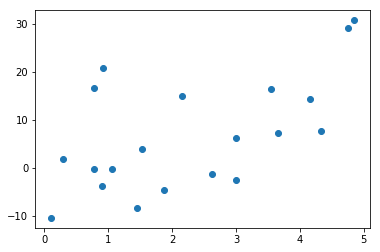

In [1]:
# An example on regularized models
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# generate dataset
np.random.seed(42)
m = 20  # number of instances
X = 5 * np.random.rand(m, 1)  # inputs are uniformly distributed
                              # on interval [0, 3).
# target value equals 1 + 0.5x + x^2 + Gaussian error N(0, 100)
y = 1 + 0.5 * X + X ** 2 + np.random.randn(m, 1) * 10
plt.scatter(X, y)
plt.show()

In [ ]:
# Let's build a polynomial regression model with no regularization 
# Use sklearn.preprocessing.PolynomialFeatures to transform
# input X into X_poly that contains powers up to degree 20.


# scale the input features, so that all powers have zero mean 
# and unit variance


# Polynomial regression is just linear regression with
# polynomial terms of features. 
# Use sklearn.linear_model.LinearRegression to fit X_poly and y


# plot regression line and the training dataset


In [ ]:
# polynomial regression model with L2 (Ridge) regression
from sklearn.linear_model import Ridge

# choose different values of alpha's: 0, 0.05, 1


In [ ]:
# polynomial regression with L1 (Lasso) regression
from sklearn.linear_model import Lasso

# we can combine polynomial transform and linear regression 
# using sklearn.pipeline.Pipeline
from sklearn.pipeline import Pipeline



## Multiclass Classification on MNIST
How to represent multiple classes?
- use a number to represent each class (0 for 0, 1 for 1, etc.)
- one-hot encoding (0 -> (1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
- binary encoding (4 -> (100)_2 -> (1, 0, 0))

The following example uses numeric representation

In [2]:
# fetch MNIST data from mldata.org
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
# load data and target as X and y
X, y = mnist['data'], mnist['target']
# use sklearn.model_selection.train_test_split to split dataset
# into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=42)

In [7]:
%%timeit
# Use logistic regression from SGDClassifier to fit the dataset
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log',
                    penalty='l2',
                    alpha=0.0001,
                    l1_ratio=0,
                    fit_intercept=True,
                    verbose=1,
                    n_jobs=1,
                    random_state=42)
sgd.fit(X_train,y_train)

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 1.17 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.73 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.3s finished


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 1.19 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.72 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.2s finished


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 1.17 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.63 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.1s finished


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.25 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 0.32 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.20 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.0s finished


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 0.46 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.27 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 1.17 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.59 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.6s finished



Total training time: 1.07 seconds.
-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 1.17 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
To

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.2s finished


-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4119.76, NNZs: 632, Bias: -179.142426, T: 120000, Avg. loss: 4769.617164
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 3197.14, NNZs: 637, Bias: -185.925443, T: 180000, Avg. loss: 2634.354905
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 2624.19, NNZs: 639, Bias: -191.121030, T: 240000, Avg. loss: 1898.494662
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 2309.63, NNZs: 643, Bias: -194.392899, T: 300000, Avg. loss: 1451.100039
Total training time: 0.48 seconds.
-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3049.23, NNZs: 593, Bias: -37.362417, T: 120000, Avg. loss: 2920.786217
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2300.55, NNZs: 613, Bias: -39.188405, T: 180000, Avg. loss: 1639.823167
Total training time: 0.29 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.9s finished


In [8]:
%%timeit
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log',
                    penalty='l2',
                    alpha=0.0001,
                    l1_ratio=0,
                    fit_intercept=True,
                    verbose=1,
                    n_jobs=-1,
                    random_state=42)
sgd.fit(X_train,y_train)

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1




Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938

Total training time: 0.33 seconds.Total training time: 0.35 seconds.

-- Epoch 2-- Epoch 2

Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 5796.94, NNZs: 607, Bias: -46.334055, T: 60000, Avg. loss: 41098.270957
Total training time: 0.35 seconds.
-- Epoch 2Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714


Total tra

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.1s


Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856Total training time: 0.40 seconds.

Total training time: 0.40 seconds.-- Epoch 3

-- Epoch 3
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463

Total training time: 0.55 seconds.Total training time: 0.55 seconds.

-- Epoch 4-- Epoch 4

Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090

Total training time: 0.70 seconds.Total training time: 0.70 seconds.

-- Epoch 5-- Epoch 5

Norm: 2223.75, NNZs: 659, Bias: -867.198365, T: 300000, Avg. loss: 8708.155589
Norm: 2157.04, NNZs: 658, Bias: -372.450890, T: 300000, Avg. loss: 5700.366259Total training time: 0.84 seconds.

Total training time: 0.84 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1







Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332Norm: 5796.94, NNZs: 607, Bias: -46.334055, T: 60000, Avg. loss: 41098.270957

Total training time: 0.40 seconds.Total training time: 0.38 seconds.

-- Epoch 2-- Epoch 2

Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 6505.97, NNZs: 611, Bias: -262.41761

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s


Norm: 7534.23, NNZs: 633, Bias: -680.711532, T: 60000, Avg. loss: 167341.581345
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 7041.42, NNZs: 633, Bias: -286.020058, T: 60000, Avg. loss: 108380.107610
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090
Total training time: 0.87 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1






Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 5796.94, NNZs: 607, Bias: -46.334055, T: 60000, Avg. loss: 41098.270957
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.19665

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s


Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 2157.04, NNZs: 658, Bias: -372.450890, T: 300000, Avg. loss: 5700.366259
Total training time: 1.04 seconds.
Norm: 2223.75, NNZs: 659, Bias: -867.198365, T: 300000, Avg. loss: 8708.155589
Total training time: 1.09 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714

Total training time: 0.37 seconds.Total training time: 0.36 seconds.

-- Epoch 2-- Epoch 2

Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 5796.94, NNZs: 607, Bias: -46.33405

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s


Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 2223.75, NNZs: 659, Bias: -867.198365, T: 300000, Avg. loss: 8708.155589
Total training time: 0.78 seconds.
Norm: 2157.04, NNZs: 658, Bias: -372.450890, T: 300000, Avg. loss: 5700.366259
Total training time: 0.71 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1






-- Epoch 1
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.40 seconds.Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332

-- Epoch 2Total training time: 0.38 seconds.

-- Epoch 2
Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 5796.94, NNZs: 607, Bias: -46.33405

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.1s


Norm: 7534.23, NNZs: 633, Bias: -680.711532, T: 60000, Avg. loss: 167341.581345
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 7041.42, NNZs: 633, Bias: -286.020058, T: 60000, Avg. loss: 108380.107610
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090
Total training time: 0.64 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1




-- Epoch 1
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.27 seconds.
Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332-- Epoch 2


Total training time: 0.24 seconds.Total training time: 0.27 seconds.

-- Epoch 2-- Epoch 2

Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 5796.94, NNZs: 607, Bias: -46.33405

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.5s remaining:    1.0s


Norm: 7041.42, NNZs: 633, Bias: -286.020058, T: 60000, Avg. loss: 108380.107610
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 7534.23, NNZs: 633, Bias: -680.711532, T: 60000, Avg. loss: 167341.581345
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856
Total training time: 0.76 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





-- Epoch 1
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 5796.94, NNZs: 607, Bias: -46.334055, T: 60000, Avg. loss: 41098.270957
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 6285.37, NNZs: 594, Bias: -154.973924, T: 60000, Avg. loss: 45506.399585
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 7852.95, NNZs: 630, Bias: 61.99126

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s



Norm: 2342.60, NNZs: 666, Bias: -111.639920, T: 300000, Avg. loss: 2382.077964
Total training time: 1.92 seconds.
Norm: 2510.90, NNZs: 648, Bias: 82.891730, T: 300000, Avg. loss: 4281.053557
Total training time: 1.96 seconds.
Norm: 7534.23, NNZs: 633, Bias: -680.711532, T: 60000, Avg. loss: 167341.581345
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 7041.42, NNZs: 633, Bias: -286.020058, T: 60000, Avg. loss: 108380.107610
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4438.16, NNZs: 645, Bias: -761.714241, T: 120000, Avg. loss: 26912.034856
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 2561.56, NN

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1






Norm: 5796.94, NNZs: 607, Bias: -46.334055, T: 60000, Avg. loss: 41098.270957
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 7028.33, NNZs: 652, Bias: -89.924356, T: 60000, Avg. loss: 54758.953714
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 7852.95, NNZs: 630, Bias: 61.991262, T: 60000, Avg. loss: 89462.399733
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 6927.81, NNZs: 620, Bias: -166.589677, T: 60000, Avg. loss: 39837.371040
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 4854.39, NNZs: 579, Bias: -33.612806, T: 60000, Avg. loss: 22752.272332
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 7035.49, NNZs: 633, Bias: -161.196652, T: 60000, Avg. loss: 72292.659162
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 6505.97, NNZs: 611, Bias: -262.417615, T: 60000, Avg. loss: 85359.730938
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 6285.37, NNZs: 594, Bias: -154.97392

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.3s remaining:    1.5s


Norm: 4337.35, NNZs: 645, Bias: -324.560391, T: 120000, Avg. loss: 17859.240742
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 3281.61, NNZs: 653, Bias: -809.145720, T: 180000, Avg. loss: 15860.195463
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 3192.84, NNZs: 656, Bias: -345.834889, T: 180000, Avg. loss: 10578.312006
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 2630.73, NNZs: 655, Bias: -841.435733, T: 240000, Avg. loss: 11149.085856
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 2561.56, NNZs: 657, Bias: -360.810415, T: 240000, Avg. loss: 7284.062090
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 2223.75, NNZs: 659, Bias: -867.198365, T: 300000, Avg. loss: 8708.155589
Total training time: 1.05 seconds.
Norm: 2157.04, NNZs: 658, Bias: -372.450890, T: 300000, Avg. loss: 5700.366259
Total training time: 0.99 seconds.
3.65 s ± 332 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


In [9]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log',
                    penalty='l2',
                    alpha=0.0001,
                    l1_ratio=0,
                    fit_intercept=True,
                    verbose=0,
                    n_jobs=-1,
                    random_state=42)
sgd.fit(X_train,y_train)

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=None, n_iter=None, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [19]:
## scale the input features
from sklearn.preprocessing import StandardScaler
import numpy as np

sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
print(np.mean(X_train, axis=0))
print(np.mean(X_train, axis=0).shape)



[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.91036269e-15   1.00296577e-15   6.60245007e-17   6.88109003e-17
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.02350044e-16   1.28583645e-15  -4.30456538e-16  -1.13089688e-16
   8.96144501e-16  -1.06882524e-15  -4.19502396e-17  -6.97555439e-18
  -7.04506592e-16   3.34804776e-15   1.38969553e-15  -4.45495758e-15
  -4.01924154e-15  -2.64913936e-15   1.86924666e-16  -2.81208274e-16
   1.76230211e-16   3.67069245e-15   8.63261083e-16  -1.32324707e-16
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [20]:
# fit the dataset
sgd.fit(X_train,y_train)

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=None, n_iter=None, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [23]:
# perform cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd,X_train,y_train,cv=3,scoring = 'accuracy')
scores.sort()
accuracy = scores.mean()
print(scores)
print('accuracy:', accuracy)


C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\

[ 0.90718608  0.91025     0.91211318]
accuracy: 0.909849753645


In [25]:
# confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amanda\Anaconda3\lib\

[[5749    3   23   10   10   36   50    8   29    3]
 [   1 6473   41   26    6   40   10   18  128   10]
 [  51   33 5319  113   94   24   91   62  189   15]
 [  46   31  133 5371    3  227   36   51  136   99]
 [  16   26   42    8 5403    8   59   35   84  215]
 [  69   36   37  182   83 4591  105   30  171   90]
 [  31   27   53    3   42   99 5535    7   46    1]
 [  32   21   75   26   64    9    2 5763   22  210]
 [  53  133   68  138   21  157   63   33 5040  133]
 [  47   31   30   80  155   36    2  199   78 5347]]


Using matplotlib backend: Qt5Agg


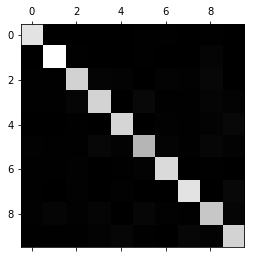

In [26]:
# plot confusion matrix using plt.matshow()
# use gray scale by setting cmap=plt.cm.gray
import matplotlib.pyplot as plt
%matplotlib
plt.matshow(confusion_matrix(y_train,y_train_pred),cmap=plt.cm.gray)

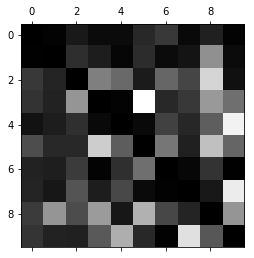

In [29]:
# Which mis-classification happens most frequently?
# fill diagonal on confusion matrix with 0 (np.fill_diagonal)
conf_matrix1 = confusion_matrix(y_train,y_train_pred)
np.fill_diagonal(conf_matrix1,0)
plt.matshow(conf_matrix1, cmap=plt.cm.gray)